## Load the an image

 - Call a library to upload an image

In [192]:
from PIL import Image
import numpy as np

 - Avoid system errors

In [193]:
import warnings
warnings.simplefilter("ignore")

- Path iamge 

In [194]:
path_image = "images/leon.jpeg"

In [195]:
image = Image.open(path_image) 

In [196]:
IMG = np.array(image)

 - Testing Show

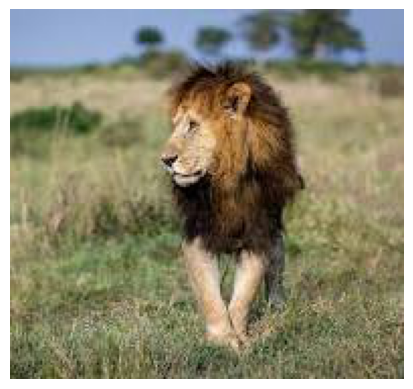

In [197]:
import matplotlib.pyplot as plt

plt.imshow(IMG ,cmap='gray')
plt.axis("off") 
plt.show()

## Determine the pixel resolution of IMG

In [198]:
print(f' Image Width: {len(IMG[0])}, Height: {len(IMG)}')

 Image Width: 195, Height: 183


## Show the RGB values of the pixel IMG(10, 15)

In [199]:
print(f'RGB values of the pixel IMG(10, 15) is  {IMG[10][15]}')

RGB values of the pixel IMG(10, 15) is  [146 169 210]


## Calculate the brightness of IMG

In [200]:
def calculate_brightness(IMG ,img_height , img_width  ):
    brightness_values = [] 
    for i in range(0 , img_height) : 
        for j in range(0 , img_width) : 
            brightness = (IMG[i][j][0] + IMG[i][j][1] + IMG[i][j][2]) / 3
            brightness_values.append(brightness)
            
    average_brightness = sum(brightness_values) / (img_height * img_width )
    
    return  average_brightness , brightness_values

In [201]:
average_brightness ,brightness_values = calculate_brightness(IMG,len(IMG),len(IMG[0]))

print(f'Average Brightness: {average_brightness}')
print(f' Brightness values : {brightness_values[:8]}')

Average Brightness: 41.55306151043873
 Brightness values : [82.66666666666667, 82.66666666666667, 82.66666666666667, 82.66666666666667, 83.66666666666667, 83.66666666666667, 84.66666666666667, 84.66666666666667]


## Calculate the contrast of IMG

In [202]:
import math 

def calculate_contrast(average_brightness , brightness_values , N , M) : 
    
    contrast_sum = 0
    for brightness in brightness_values:
        
        contrast_sum += (brightness - average_brightness) ** 2
        
    contrast  =  math.sqrt(contrast_sum / (M * N))
    
    return contrast
    

In [203]:
print(f'Contrast: {calculate_contrast(average_brightness , brightness_values ,len(IMG[0]),len(IMG) )}')

Contrast: 24.60028387355838


## Show the each of the RGB channels separately

In [204]:
def rgb_matrix(IMG , img_height , img_width  ) : 
    
    R_matrix = []
    G_matrix = []
    B_matrix = []
    
    for i in range(0 , img_height) :
        R_row = []
        G_row = []
        B_row = []
        for j in range(0 , img_width) :
            R_row.append(IMG[i][j][0])
            G_row.append(IMG[i][j][1])
            B_row.append(IMG[i][j][2])
        
        R_matrix.append(R_row)
        G_matrix.append(G_row)
        B_matrix.append(B_row)
    
    return R_matrix , G_matrix , B_matrix

In [205]:
R_matrix , G_matrix , B_matrix = rgb_matrix(IMG , len(IMG) , len(IMG[0])  )

 - Testin Show image in channel Blue

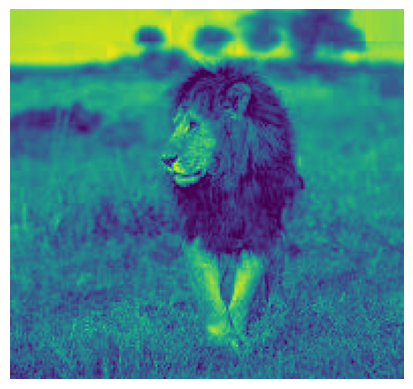

In [206]:
plt.imshow(B_matrix)
plt.axis("off") 
plt.show()

## Convert IMG to gray-level using the average method

In [207]:
def gray_level(IMG , img_height , img_width  ) :
    
    Gray_matrix = []
    for i in range(0 , img_height) :
        Gray_row = []
        for j in range(img_width):
            R = IMG[i][j][0]
            G = IMG[i][j][1]
            B = IMG[i][j][2]
            Gray = int( (R + G + B) / 3 )
            Gray_row.append(Gray)
        Gray_matrix.append(Gray_row)
    return Gray_matrix

In [208]:
Gray_matrix = gray_level(IMG , len(IMG) , len(IMG[0])  )

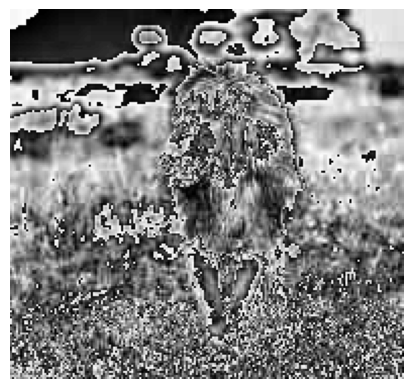

In [209]:
plt.imshow(Gray_matrix , cmap='gray')
plt.axis("off") 
plt.show()

## Convert IMG to gray-level using the weighted formula

In [210]:
def gray_level_two(IMG , img_height , img_width  ) :
    
    Gray_matrix = []
    for i in range(0 , img_height) :
        Gray_row = []
        for j in range(0 , img_width):
            R = IMG[i][j][0]
            G = IMG[i][j][1]
            B = IMG[i][j][2]
            Gray = int((R * 0.29) +( G * 0.6) + (B * 0.11))
            Gray_row.append(Gray)
        Gray_matrix.append(Gray_row)
    return Gray_matrix

In [211]:
IMG_2 = gray_level_two(IMG , len(IMG) , len(IMG[0])   )

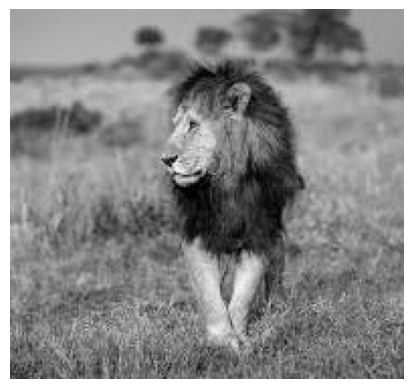

In [212]:
plt.imshow(IMG_2 , cmap='gray') # cmap='gray' View the image with grey grades
plt.axis("off") 
plt.show()

## Convert gray Level Using Python instruction

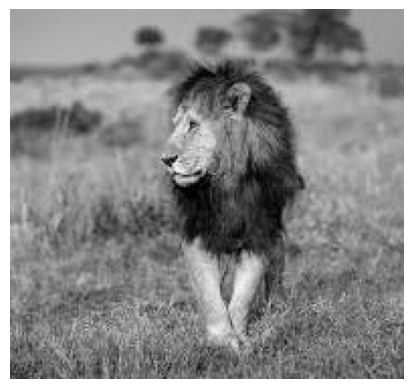

In [213]:
IMG2 = np.mean(IMG, axis=2)

plt.imshow(IMG_2 , cmap='gray') # cmap='gray' View the image with grey grades
plt.axis("off") 
plt.show()

## Determine the min / max value of IMG and IMG2

In [275]:
def min_max(img):
    min_val = IMG[0][0][0]
    max_val = IMG[0][0][0]
    
    for row in IMG :
        for pixel in row :
            for channel in pixel :  
                if channel < min_val :
                    min_val = channel
                if channel > max_val :
                    max_val = channel
    
    return min_val, max_val

In [215]:
print("IMG min / max:", min_max(IMG))
print("IMG2 min / max:", min_max(IMG_2))

IMG min / max: (0, 255)
IMG2 min / max: (0, 255)


## Calculate the pixel resolution of IMG and IMG2 in terms of MegaPixel 

In [216]:
def mega_pixel(img_height, img_width):
    total_pixels = img_height * img_width
    megapixels = total_pixels / 1000000  
    return megapixels

In [217]:
print("IMG resolution in MP:", mega_pixel(len(IMG) , len(IMG[0])) )
print("IMG2 resolution in MP:", mega_pixel(len(IMG_2) , len(IMG_2[0])) )

IMG resolution in MP: 0.035685
IMG2 resolution in MP: 0.035685


## Calculate the size of IMG

In [218]:
def image_size(img_height, img_width, channels, bit_depth=8):
    size_in_bytes = img_height * img_width * channels * (bit_depth // 8)
    return size_in_bytes

In [219]:
print("IMG size in bytes:", image_size(len(IMG) , len(IMG[0]), 3))

IMG size in bytes: 107055


## SUB_IMG the sub-image from IMG  line 50 to 70 & column 20 to 90. Display the two images

In [220]:
SUB_IMG = IMG[50: 70, 20:90]

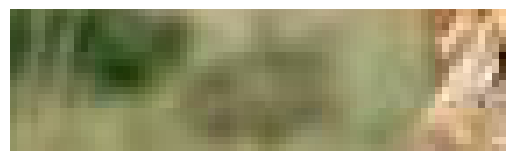

In [221]:
plt.imshow(SUB_IMG)
plt.axis("off") 
plt.show()

----

## Quantize IMG2 to 128, 64, 32 levels then display it.

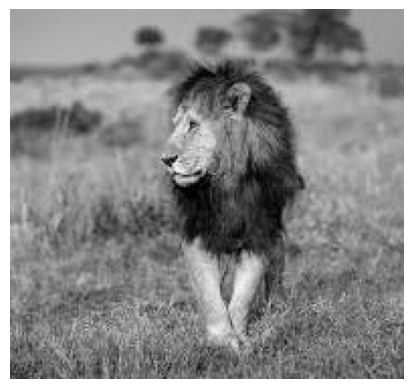

In [222]:
plt.imshow(IMG_2 ,  cmap='gray')
plt.axis("off" ) 
plt.show()

In [223]:
IMG_2 = np.array(IMG_2)

In [224]:
IMG_2

array([[159, 159, 159, ..., 153, 153, 153],
       [159, 159, 159, ..., 153, 153, 153],
       [159, 159, 159, ..., 153, 153, 153],
       ...,
       [ 48,  44,  63, ...,  79, 112,  85],
       [ 72,  85,  66, ...,  77,  99,  80],
       [ 70, 100,  84, ...,  84,  83,  60]])

In [225]:
def find_closest_value(gray_value, levels_list):
    closest_value = levels_list[0]  
    smallest_difference = abs(gray_value - closest_value)  

    for value in levels_list[1:]:  
        difference = abs(gray_value - value)
        if difference < smallest_difference:
            closest_value = value 
            smallest_difference = difference 

    return closest_value

In [226]:
def quantize(Gray_matrix , levels_list) : 
        
    quantized_matrix = []
        
    for row in Gray_matrix:
        quantized_row = []
        for gray_value in row:

            closest_value = find_closest_value(gray_value, levels_list)

            quantized_row.append(closest_value)
            
        quantized_matrix.append(quantized_row)
    
    
    return quantized_matrix

    

In [227]:
New_IMG_2 = quantize(IMG_2 , [32 , 64 , 128])


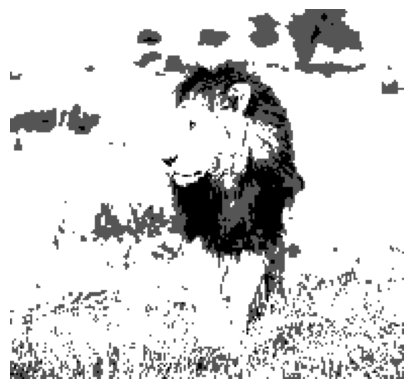

In [228]:
plt.imshow(New_IMG_2 ,  cmap='gray')
plt.axis("off" ) 
plt.show()

## Convert RGB image  to the different color spaces HSV,CMYK and YCbCr

In [229]:
def rgb_to_cmyk(IMG ,  img_height , img_width ):

    cmyk_image = list()
    for i in range(img_height):
        cmyk_image.append([])
        for j in range(img_width):
            r, g, b = IMG[i][j]
            r, g, b = r / 255, g / 255, b / 255

            k = 1 - max(r, g, b)
            c = (1 - r - k) / (1 - k)
            m = (1 - g - k) / (1 - k)
            y = (1 - b - k) / (1 - k)

            cmyk_image[i].append(
                [round(c * 100), round(m * 100), round(y * 100), round(k * 100)]
            )

    return cmyk_image

In [230]:
def rgb_to_hsv(IMG ,  img_height , img_width ):

    hsv_image = list()
    for i in range(img_height):
        hsv_image.append([])
        for j in range(img_width):
            r, g, b = IMG[i][j]
            r, g, b = r / 255, g / 255, b / 255

            cmax = max(r, g, b)
            cmin = min(r, g, b)
            delta = cmax - cmin

            if delta == 0:
                h = 0
            elif cmax == r:
                h = 60 * (((g - b) / delta) % 6)
            elif cmax == g:
                h = 60 * (((b - r) / delta) + 4)
            elif cmax == b:
                h = 60 * (((r - g) / delta) + 2)

            if cmax == 0:
                s = 0
            else:
                s = delta / cmax

            hsv_image[i].append([h, s, cmax])

    return hsv_image

In [231]:
def rgb_to_YCbCr(IMG,  img_height , img_width):

    ycbcr = list()
    for i in range(img_height):
        ycbcr.append([])
        for j in range(img_width):
            r, g, b = IMG[i][j]
            y = 0.299 * r + 0.587 * g + 0.114 * b
            cb = 0.564 * (b - y) + 128
            cr = 0.713 * (r - y) + 128

            ycbcr[i].append([y, cb, cr])

    return ycbcr

In [232]:
"""


"""

'\n\n\n'

### Binarizing IMG2 according to 10, 50, 125, 25 as threshold

In [233]:
import copy
def binarize(IMG,  img_height , img_width, threshold):

    
    result = copy.deepcopy(IMG)
    for i in range(img_height):
        for j in range(img_width):
            if result[i][j] > threshold:
                result[i][j] = 255
            else:
                result[i][j] = 0
    return result

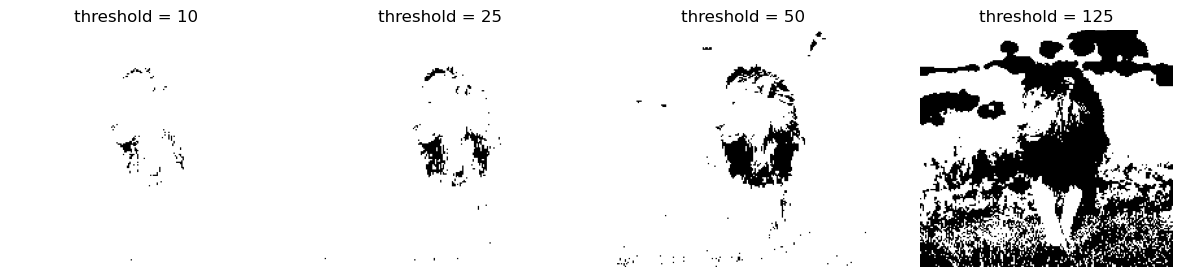

In [234]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1, 4)

thresholds = [10, 25, 50, 125]
for i, threshold in enumerate(thresholds):
    ax[i].imshow(binarize(IMG_2, len(IMG_2), len(IMG_2[0]), threshold=threshold), cmap="gray")
    ax[i].set_title(f"threshold = {threshold}")
    ax[i].axis("off")  


fig.set_size_inches(15, 5)
plt.show()


##  Complementary image of IMG2 and its binarized version

In [235]:
def compliment(IMG,  img_height , img_width):

    result = copy.deepcopy(IMG)
    for i in range(img_height):
        for j in range(img_width):
            result[i][j] = 255 - result[i][j]
    return result

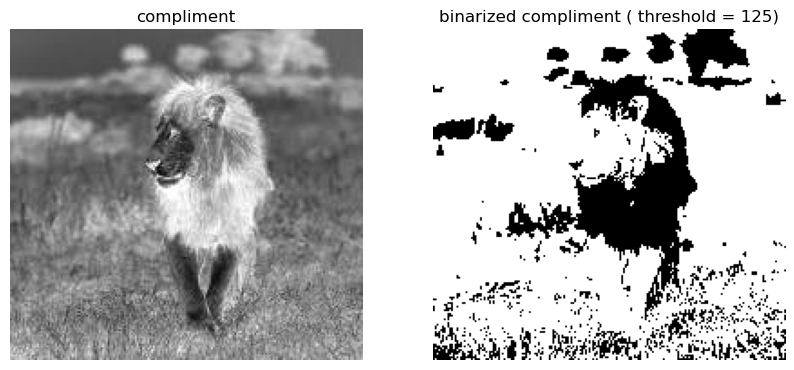

In [236]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(  compliment( IMG_2,  len(IMG_2), len(IMG_2[0])), cmap="gray")
ax[0].set_title("compliment")
ax[0].axis("off") 

ax[1].imshow(  binarize( New_IMG_2, len(New_IMG_2), len(New_IMG_2[0]) , 125), cmap="gray")
ax[1].set_title("binarized compliment ( threshold = 125)")
ax[1].axis("off") 

fig.set_size_inches(10, 5)
plt.show()

## Adding (and subtracting) the following values 10, 30,60, 200 from IMG2

In [237]:
def add_value(IMG, value):
    matrix = []
    
    for row in IMG:
        matrix_row = []
        
        for gray_value in row:
            
            new_value = gray_value + value
            
            new_value = min(max(new_value, 0), 255)
            
            matrix_row.append(new_value)
        
        matrix.append(matrix_row)
    
    return matrix


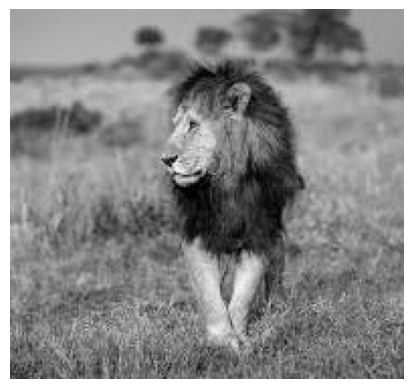

In [238]:
plt.imshow(IMG_2 ,  cmap='gray')
plt.axis("off" ) 
plt.show()

---

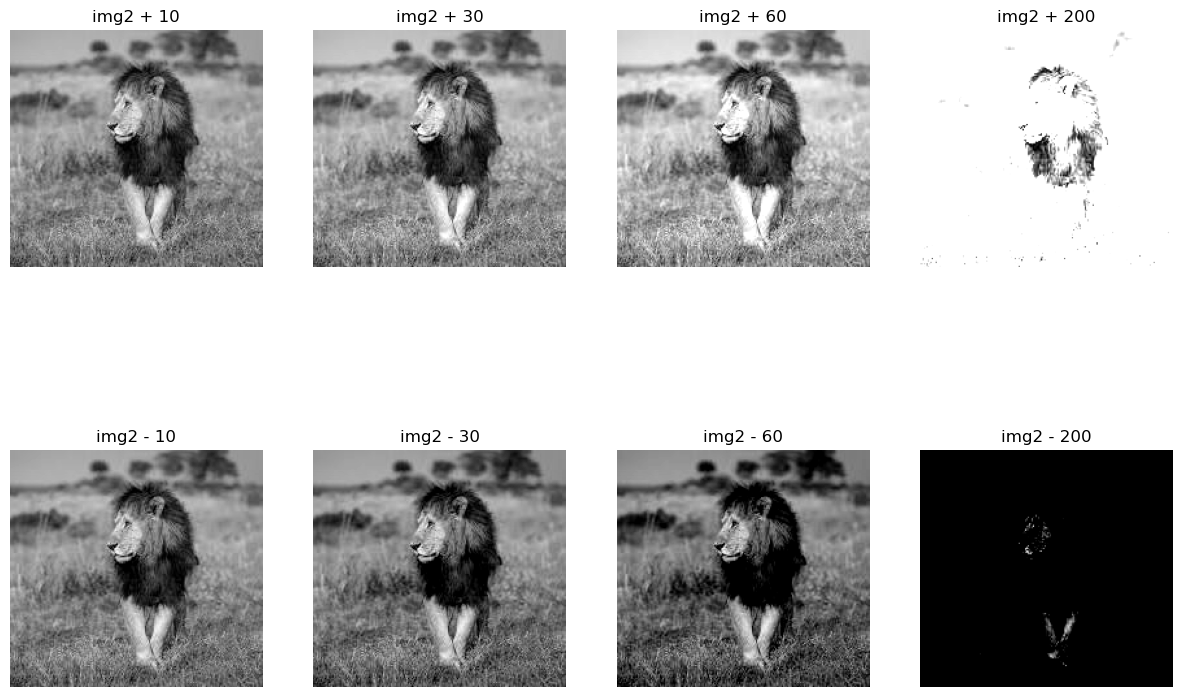

In [239]:
fig, ax = plt.subplots(2, 4)
ax[0, 0].imshow(add_value(IMG_2, value=10), cmap="gray")
ax[0, 0].set_title("img2 + 10")
ax[0, 0].axis("off")

ax[0, 1].imshow(add_value(IMG_2, value=30), cmap="gray")
ax[0, 1].set_title("img2 + 30")
ax[0, 1].axis("off")

ax[0, 2].imshow(add_value(IMG_2, value=60), cmap="gray")
ax[0, 2].set_title("img2 + 60")
ax[0, 2].axis("off")

ax[0, 3].imshow(add_value(IMG_2, value=200), cmap="gray")
ax[0, 3].set_title("img2 + 200")
ax[0, 3].axis("off")

ax[1, 0].imshow(add_value(IMG_2, value=-10), cmap="gray")
ax[1, 0].set_title("img2 - 10")
ax[1, 0].axis("off")

ax[1, 1].imshow(add_value(IMG_2, value=-30), cmap="gray")
ax[1, 1].set_title("img2 - 30")
ax[1, 1].axis("off")

ax[1, 2].imshow(add_value(IMG_2, value=-60), cmap="gray")
ax[1, 2].set_title("img2 - 60")
ax[1, 2].axis("off")

ax[1, 3].imshow(add_value(IMG_2, value=-200), cmap="gray")
ax[1, 3].set_title("img2 - 200")
ax[1, 3].axis("off")

fig.set_size_inches(15, 10)
plt.show()

##  Multiply IMG2 by 1.7 and 0.6, respectively. 

In [240]:
def multiply_value(IMG, value):
    matrix = []
    
    for row in IMG:
        matrix_row = []
        
        for gray_value in row:
            
            new_value = gray_value * value
            
            new_value = min(max(new_value, 0), 255)
            
            matrix_row.append(new_value)
        
        matrix.append(matrix_row)
    
    return matrix

---

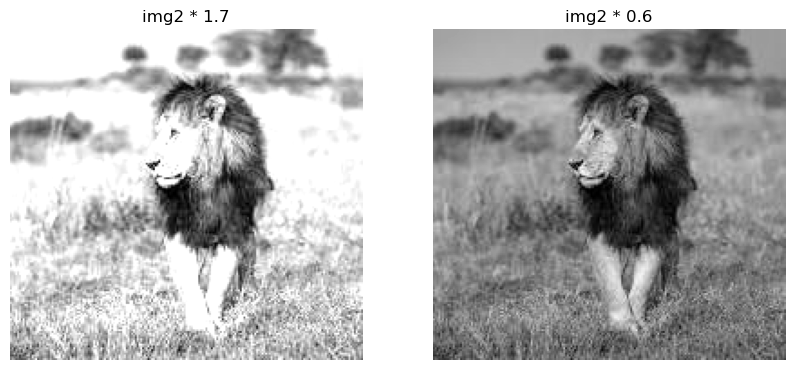

In [241]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(multiply_value(IMG_2, value=1.7), cmap="gray")
ax[0].set_title("img2 * 1.7")
ax[0].axis("off")

ax[1].imshow(multiply_value(IMG_2, value=0.6), cmap="gray")
ax[1].set_title("img2 * 0.6")
ax[1].axis("off")

fig.set_size_inches(10, 5)
plt.show()

## Devise the image on 2 and 0.5, respectively

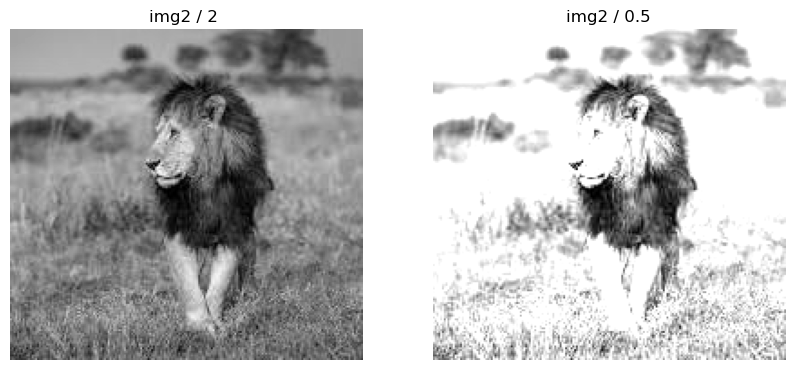

In [242]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(multiply_value(IMG_2, value=1/2), cmap="gray")
ax[0].set_title("img2 / 2 ")
ax[0].axis("off")

ax[1].imshow(multiply_value(IMG_2, value=1/0.5), cmap="gray")
ax[1].set_title("img2 / 0.5")
ax[1].axis("off")

fig.set_size_inches(10, 5)
plt.show()

---

#  Load the another image from your choice (IMG3)

In [243]:
path_image = "images/Canadian-elk.jpg"

In [244]:
image = Image.open(path_image) 

In [245]:
IMG_3 = np.array(image)

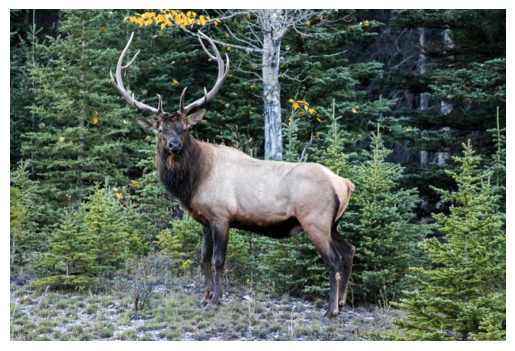

In [246]:
plt.imshow(IMG_3)
plt.axis("off") 
plt.show()

## Calculate the min / max (IMG2, IMG3) 

In [247]:
import numpy as np

def blank(m, n):
    return np.zeros((m, n), dtype=np.uint8)

In [248]:
def min_max(image1, image2):
    m = min(len(image1), len(image2))
    n = min(len(image1[0]), len(image2[0]))
    result_min = blank(m, n)
    result_max = blank(m, n)
    
    for i in range(m):
        for j in range(n):
            if image1[i][j] <= image2[i][j]:
                result_min[i][j] = image1[i][j]
                result_max[i][j] = image2[i][j]
            else:
                result_min[i][j] = image2[i][j]
                result_max[i][j] = image1[i][j]
    
    return result_min, result_max

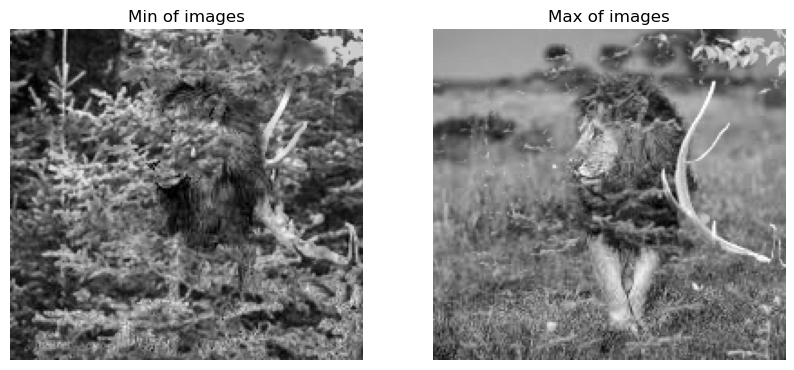

In [249]:
fig, ax = plt.subplots(1, 2)
min_image, max_image = min_max(image1=IMG_2, image2=gray_level_two(IMG_3 , len(IMG_3) , len(IMG_3[0])))
ax[0].imshow(min_image, cmap="gray")
ax[0].set_title("Min of images")
ax[0].axis("off")

ax[1].imshow(max_image, cmap="gray")
ax[1].set_title("Max of images")
ax[1].axis("off")

fig.set_size_inches(10, 5)
plt.show()

## Combining IMG2 and IMG3 linearly using (0.1, 0.9), (0.5, 0.5),(0.9, 0.1)

In [250]:
def linear_combination(image1 ,image2 ,a ,b ):
    h = min(len(image1), len(image2))
    w = min(len(image1[0]), len(image2[0])) 
    result = blank(h, w)
    for i in range(h):
        for j in range(w):
            result[i][j] = a * image1[i][j] + b * image2[i][j]

    return result

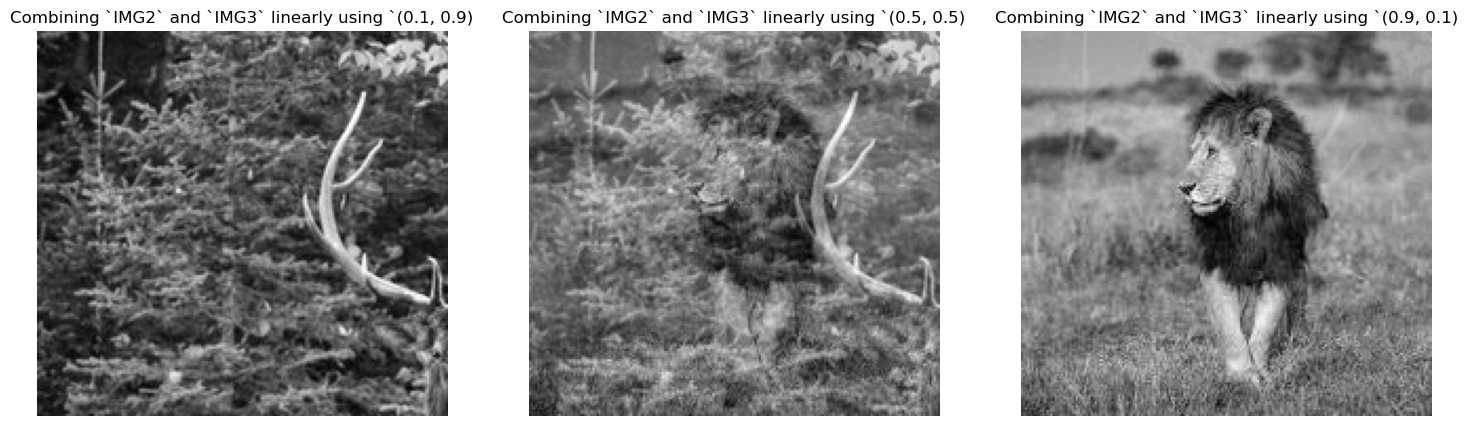

In [251]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(linear_combination(image1=IMG_2, image2=gray_level_two(IMG_3 , len(IMG_3) , len(IMG_3[0])) ,a=0.1 ,b=0.9), cmap="gray")
ax[0].set_title("Combining `IMG2` and `IMG3` linearly using `(0.1, 0.9)")
ax[0].axis("off")

ax[1].imshow(linear_combination(image1=IMG_2, image2=gray_level_two(IMG_3 , len(IMG_3) , len(IMG_3[0])) ,a=0.5 ,b=0.5), cmap="gray")
ax[1].set_title("Combining `IMG2` and `IMG3` linearly using `(0.5, 0.5)")
ax[1].axis("off")

ax[2].imshow(linear_combination(image1=IMG_2, image2=gray_level_two(IMG_3 , len(IMG_3) , len(IMG_3[0])) ,a=0.9 ,b=0.1), cmap="gray")
ax[2].set_title("Combining `IMG2` and `IMG3` linearly using `(0.9, 0.1)")
ax[2].axis("off")

fig.set_size_inches(18, 5)
plt.show()

## Creating two images containing squares

In [252]:
def create_square(image,x,y):
  result = copy.deepcopy(image)
  for i in range(x[0], x[1]):
    for j in range(y[0], y[1]):
      result[i][j] = 1
  return result

In [253]:
square_1 = create_square(
    image=blank(500,500), x=(50, 300), y=(50, 300) # x=(50, 300), y=(50, 300) 
)
square_2 = create_square(
    image=blank(500,500), x=(200, 450), y=(200, 450) # x=(200, 450), y=(200, 450)
)

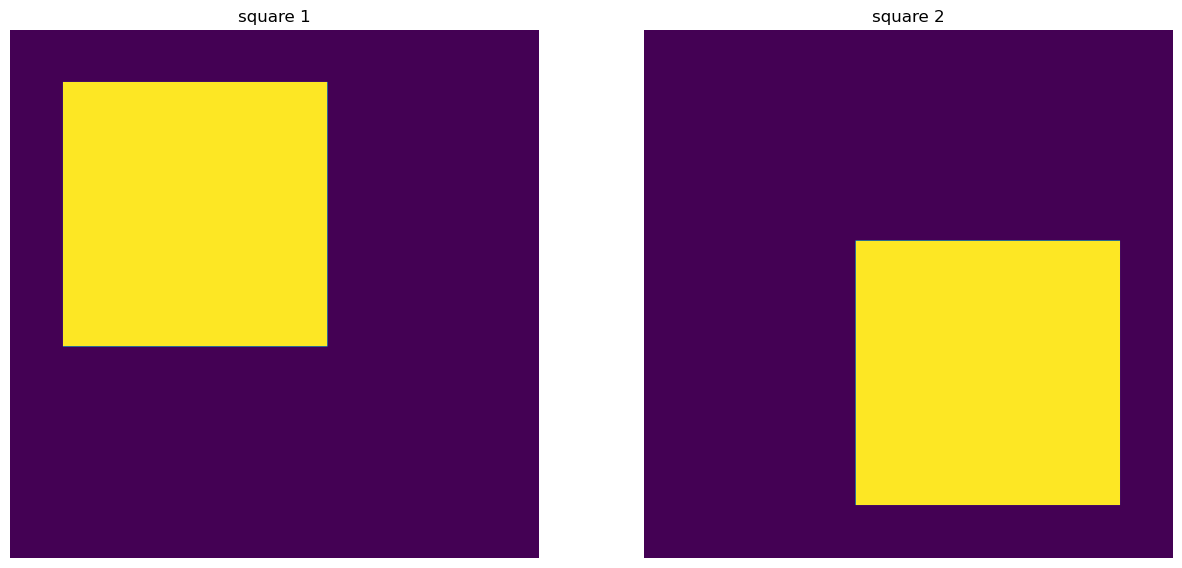

In [254]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(square_1)
ax[0].set_title("square 1")
ax[0].axis("off")

ax[1].imshow(square_2)
ax[1].set_title("square 2")
ax[1].axis("off")

fig.set_size_inches(15, 10)
plt.show()

## Performing the following logical operations: AND, OR, XOR, XNOR on the two image square

In [255]:
def image_and(image1, image2):
    result = copy.deepcopy(image1)
    m = len(image1)
    n = len(image1[0])
    for i in range(m):
        for j in range(n):
            result[i][j] = image1[i][j] and image2[i][j]
    return result


def image_or(image1, image2):
    result = copy.deepcopy(image1)
    m = len(image1)
    n = len(image1[0])
    for i in range(m):
        for j in range(n):
            result[i][j] = image1[i][j] or image2[i][j]
    return result


def image_xor(image1, image2):
    result = copy.deepcopy(image1)
    m = len(image1)
    n = len(image1[0])
    for i in range(m):
        for j in range(n):
            result[i][j] = image1[i][j] ^ image2[i][j]
    return result


def image_xnor(image1, image2):
    result = copy.deepcopy(image1)
    m = len(image1)
    n = len(image1[0])
    for i in range(m):
        for j in range(n):
            result[i][j] = ~(image1[i][j] ^ image2[i][j])
    return result

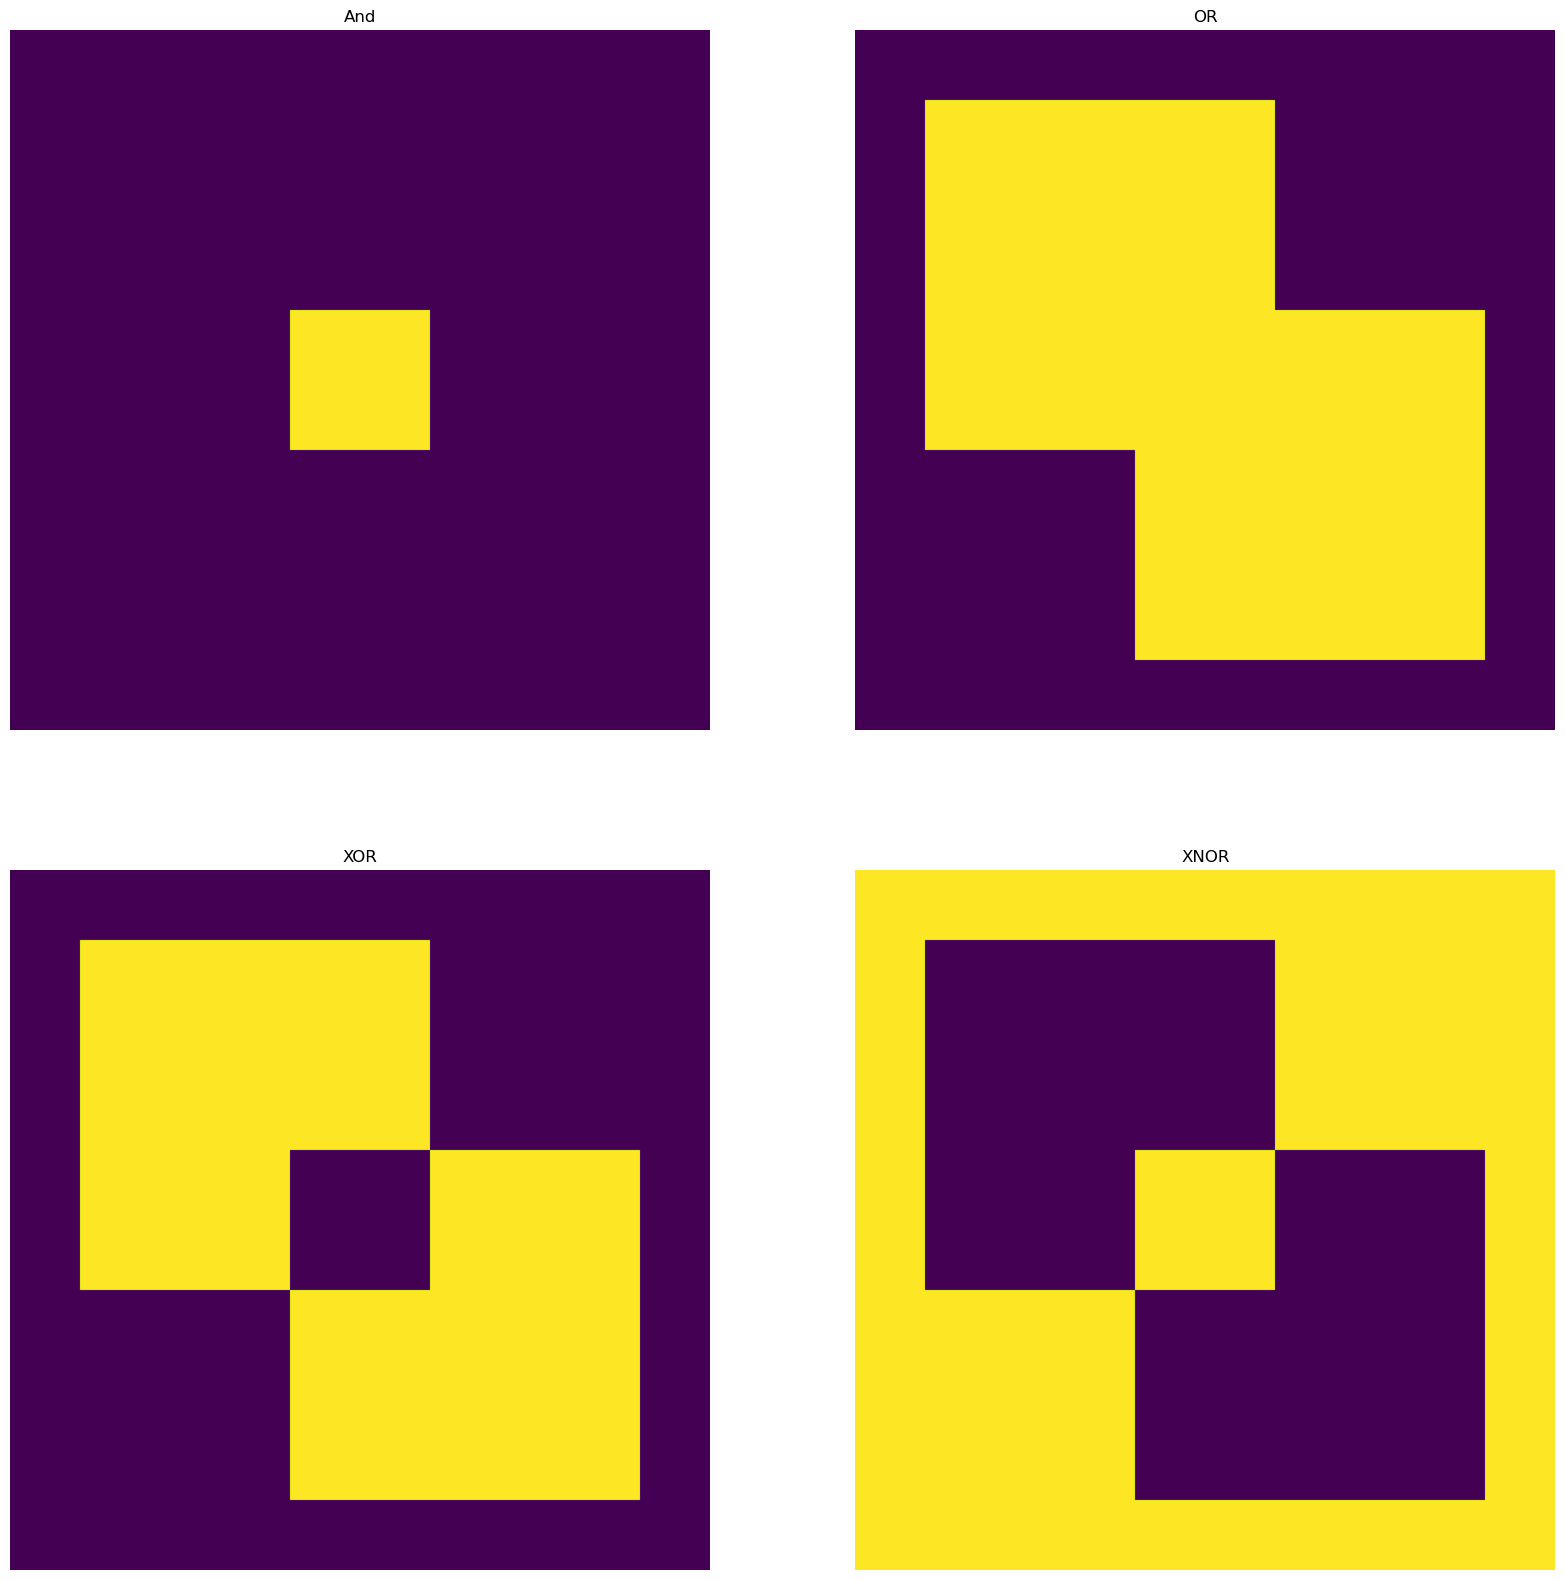

In [256]:
fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(image_and(square_1,square_2))
ax[0,0].set_title("And")
ax[0,0].axis("off")

ax[0,1].imshow(image_or(square_1,square_2))
ax[0,1].set_title("OR")
ax[0,1].axis("off")

ax[1,0].imshow(image_xor(square_1,square_2))
ax[1,0].set_title("XOR")
ax[1,0].axis("off")

ax[1,1].imshow(image_xnor(square_1,square_2))
ax[1,1].set_title("XNOR")
ax[1,1].axis("off")

fig.set_size_inches(20, 20)
plt.show()

## Generate two other binary images containing arbitrary shapes

In [257]:
def generate_binary(image):
    m = len(image)
    n = len(image[0])
    result = copy.deepcopy(image)
    for i in range(m):
        for j in range(n):
            result[i][j] = round(np.random.rand())
    return result

In [258]:
binary_image_1 = generate_binary(image = blank(50 , 50 ))
binary_image_2 = generate_binary(image = blank(50 , 50 ))

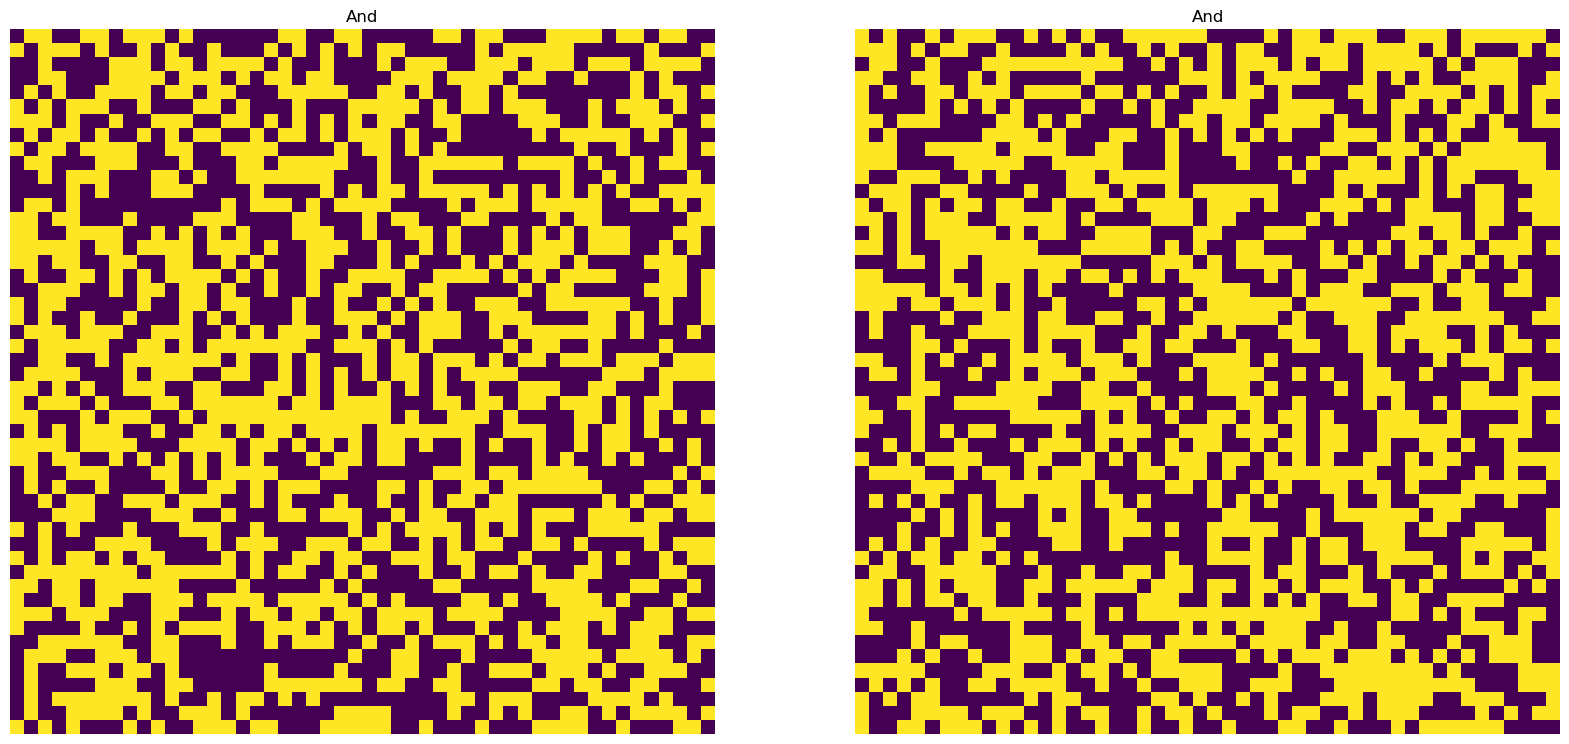

In [259]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(binary_image_1)
ax[0].set_title("And")
ax[0].axis("off")

ax[1].imshow(binary_image_2)
ax[1].set_title("And")
ax[1].axis("off")

fig.set_size_inches(20, 20)
plt.show()

---

## Performing the following operations: erosion, dilation, opening and closing on the image using a 3*3 square binary image as a structural element

In [260]:
def fitHit(structural_element, image_part):
    m = len(structural_element)
    n = len(structural_element[0])
    fit = True
    hit = False
    for i in range(m):
        for j in range(n):
            if (structural_element[i][j] == 1) and (image_part[i][j] == 0):
                fit = False
            if (structural_element[i][j] == 1) and (image_part[i][j] == 1):
                hit = True
    return fit, hit

In [261]:
def erosion_dilation(image, structural_element, operation):
    m = len(image)
    n = len(image[0])
    sm = len(structural_element)
    sn = len(structural_element[0])
    
    result = blank(m, n)
    for i in range(m - sm):
        for j in range(n - sn):
            image_part = [k[j : j + sn] for k in image[i : i + sm]]
            if operation == 0:
                if fitHit(structural_element, image_part)[0]:
                    result[i + np.ceil(sm / 2).astype(int)][
                        j + np.ceil(sn / 2).astype(int)
                    ] = 1
            elif operation == 1:
                if fitHit(structural_element, image_part)[1]:
                    result[i + np.ceil(sm / 2).astype(int)][
                        j + np.ceil(sn / 2).astype(int)
                    ] = 1
    return result

In [262]:
def opening_closing(image, structural_element, operation):
    if operation == 0:
        return erosion_dilation(erosion_dilation(image, structural_element, 0), structural_element, 1)
    
    elif operation == 1: # opening
        return erosion_dilation(erosion_dilation(image, structural_element, 1), structural_element, 0)

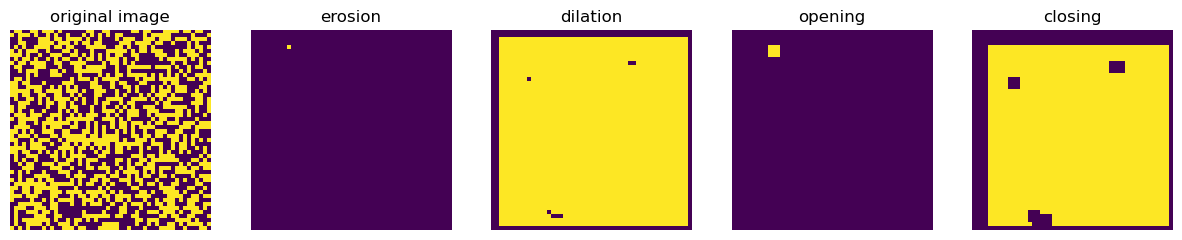

In [263]:
structural_element = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
fig, ax = plt.subplots(1, 5)

ax[0].imshow(binary_image_1)
ax[0].set_title("original image")
ax[0].axis("off")


ax[1].imshow(
    erosion_dilation(
        image=binary_image_1, structural_element=structural_element, operation=0
    )
)
ax[1].set_title("erosion")
ax[1].axis("off")


ax[2].imshow(
    erosion_dilation(
        image=binary_image_1, structural_element=structural_element, operation=1
    )
)
ax[2].set_title("dilation")
ax[2].axis("off")

ax[3].imshow(
    opening_closing(image=binary_image_1, structural_element=structural_element, operation=0)
)
ax[3].set_title("opening")
ax[3].axis("off")

ax[4].imshow(
    opening_closing(image=binary_image_1, structural_element=structural_element, operation=1)
)
ax[4].set_title("closing")
ax[4].axis("off")


fig.set_size_inches(15, 10)
plt.show()

---

## Generate the gray-level histogram of IMG2

In [264]:
def pixel_values(image, value):
    m = len(image)
    n = len(image[0])
    count = 0
    for i in range(m):
        for j in range(n):
            if image[i][j] == value:
                count += 1
    return count

def gray_level_histogram(image):
    return [pixel_values(image, i) for i in range(256)]

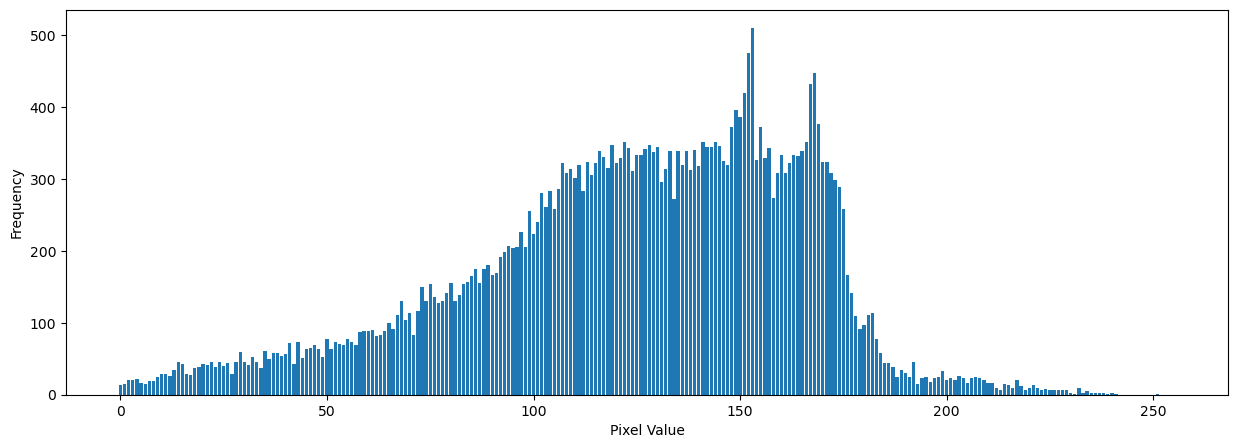

In [265]:
plt.figure(figsize=(15,5))
plt.bar(range(256), gray_level_histogram(IMG_2))
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

---

## Adding 70 to all the image pixels, and comparing the histogram before and after

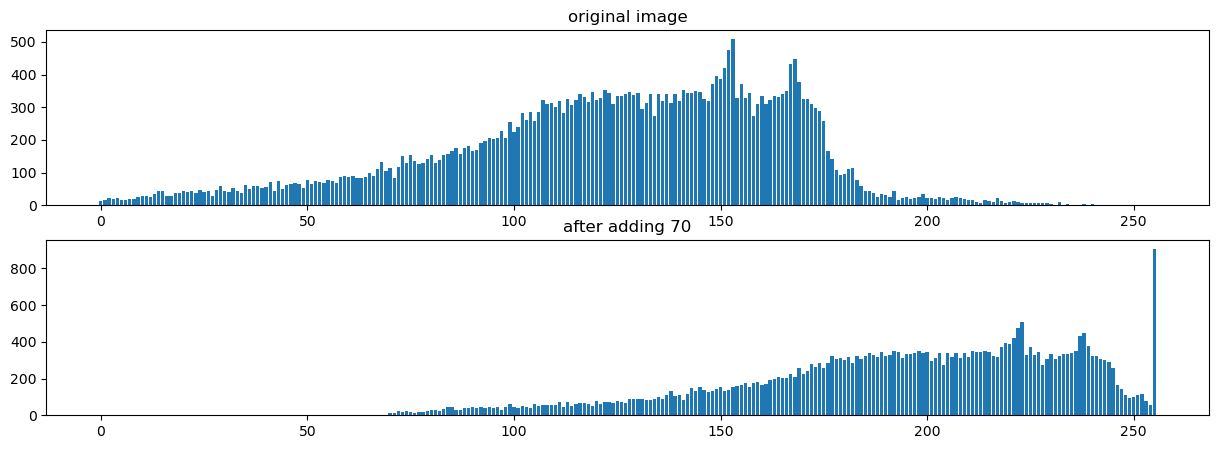

In [266]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(15, 5)

ax[0].bar(range(256), gray_level_histogram(IMG_2))
ax[0].set_title("original image")


ax[1].bar(range(256), gray_level_histogram(add_value(IMG_2, 70)))
ax[1].set_title("after adding 70")

plt.show()

---

## Loading a low contrast image IMG4

In [267]:
path_image = "images/image-low-contrast.jpg" 

In [268]:
image = Image.open(path_image)

In [269]:
IMG_4 = np.array(image)

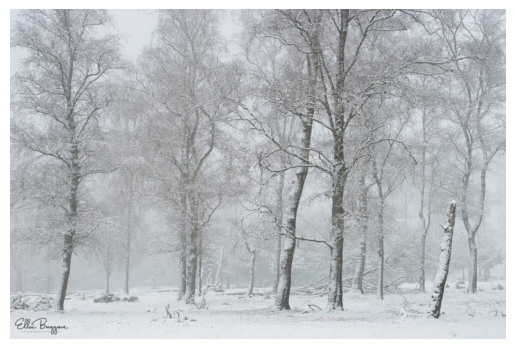

In [270]:
plt.imshow(IMG_4) 
plt.axis("off") 
plt.show()

In [271]:
G_IMG_4 = gray_level_two(IMG_4 , len(IMG_4) , len(IMG_4[0]))
G_IMG_4 = np.array(G_IMG_4)

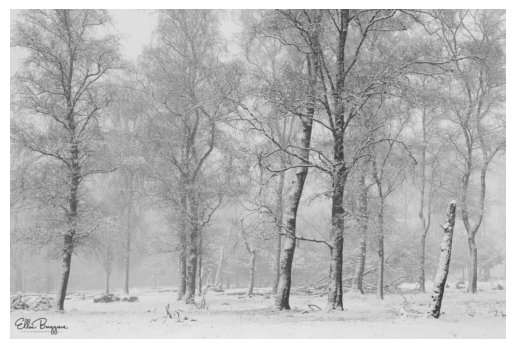

In [272]:
plt.imshow(G_IMG_4 , cmap='gray') 
plt.axis("off") 
plt.show()

---

## Apply the histogram stretching (the two formulas of course), and show the histogram before and after each process.

In [281]:
def histogram_stretching(image, r, formula):
    m = len(image)
    n = len(image[0])
    
    imin, imax = min_max(image)
    rmin, rmax = r
    
    result = copy.deepcopy(image)
    if formula == 0:
        a = (rmax - rmin) / (imax - imin)
        b = rmax - a * imax
        for i in range(m):
            for j in range(n):
                result[i][j] = round(a * result[i][j] + b)
    elif formula == 1:
        for i in range(m):
            for j in range(n):
                result[i][j] = round(rmax * (result[i][j] - imin) / (imax - imin))
    return result

In [285]:
stretched_1 = histogram_stretching(G_IMG_4, (50, 255), 0).flatten()
stretched_2 = histogram_stretching(G_IMG_4, (50, 255), 1).flatten()

In [286]:
histogram_1, _ = np.histogram(stretched_1, bins=256, range=(0, 255))
histogram_2, _ = np.histogram(stretched_2, bins=256, range=(0, 255))

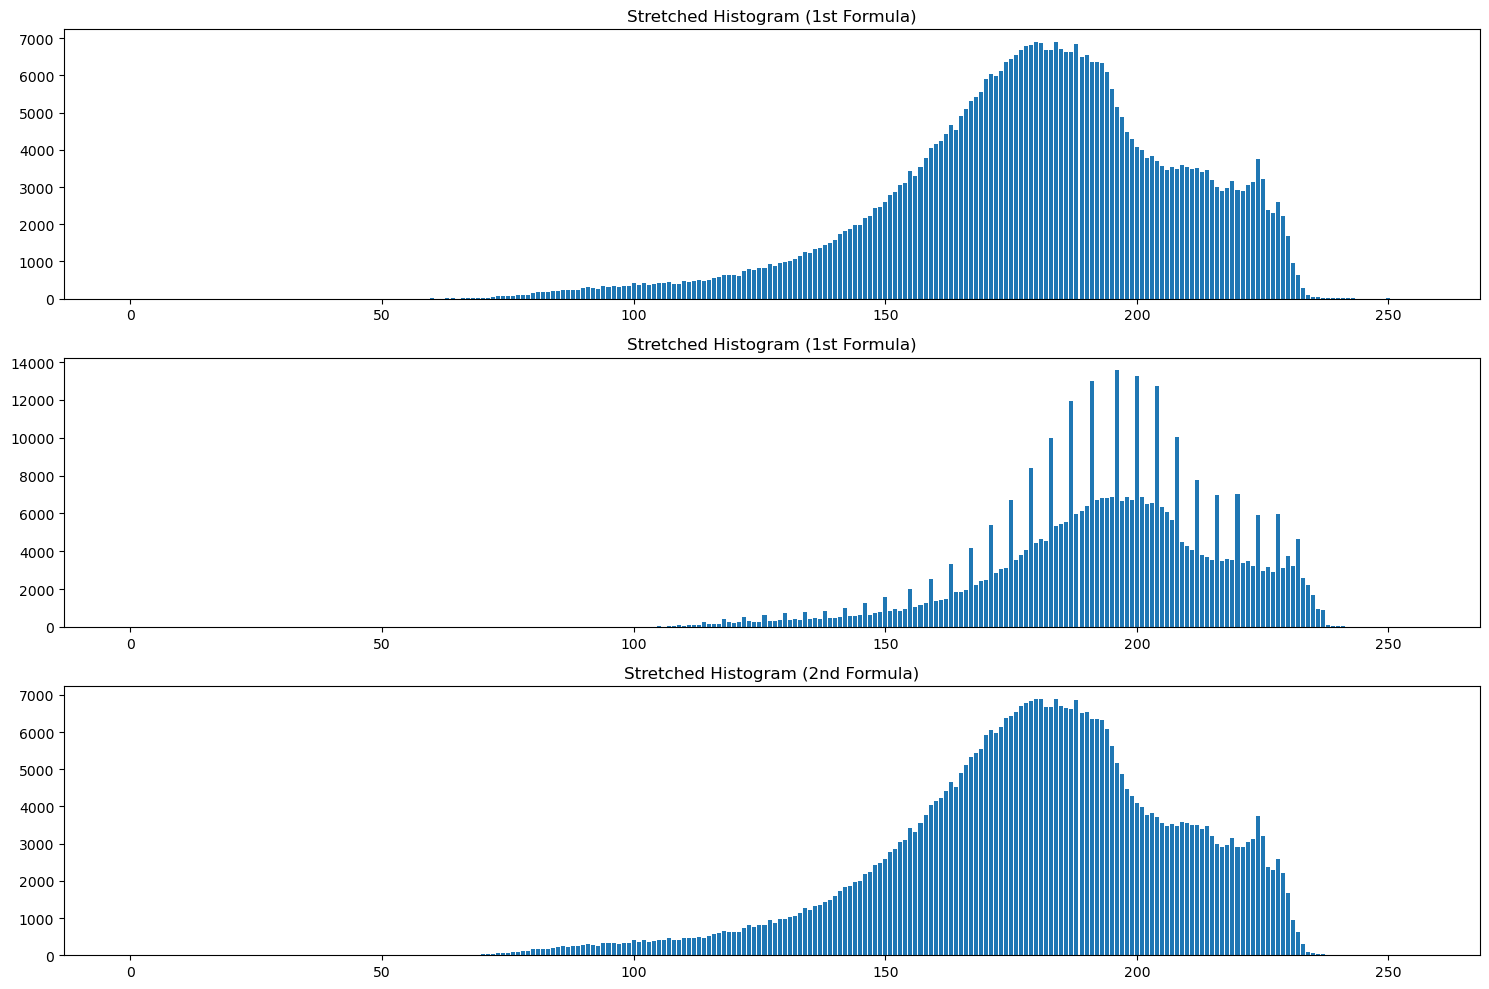

In [287]:
fig, ax = plt.subplots(3, 1)
fig.set_size_inches(15, 10)

ax[0].bar(range(256), gray_level_histogram(G_IMG_4))
ax[0].set_title("Stretched Histogram (1st Formula)")

ax[1].bar(range(256), histogram_1)
ax[1].set_title("Stretched Histogram (1st Formula)")

ax[2].bar(range(256), histogram_2)
ax[2].set_title("Stretched Histogram (2nd Formula)")

plt.tight_layout()
plt.show()